In [2]:
import pandas as pd 

In [3]:
df = pd.DataFrame(
    [[1, 100, 10, 'OOC'],
    [2, 200, 30, 'TTL'],
    [3, 123, 11, 'OOC'],
    [4, 400, 99, 'SJO']], 
    columns = ['orderID', 'componentA','componentB','customer'])

In [4]:
df['price'] = 0

In [5]:
df


,orderID,componentA,componentB,customer,price
0,1,100,10,OOC,0
1,2,200,30,TTL,0
2,3,123,11,OOC,0
3,4,400,99,SJO,0


In [6]:
priceA = 10
priceB = 15

In [7]:
df['price'] = df['componentA'] * priceA + df['componentB'] * priceB

In [8]:
df

,orderID,componentA,componentB,customer,price
0,1,100,10,OOC,1150
1,2,200,30,TTL,2450
2,3,123,11,OOC,1395
3,4,400,99,SJO,5485


In [9]:
df['price'].where(~(df['customer'] != 'OOC')).sum()

np.float64(2545.0)

In [10]:
df.loc[df['customer'] == 'OOC', 'price'].sum()


np.int64(2545)

In [11]:
df['componentA'].mean()

np.float64(205.75)

In [13]:
dfA = pd.DataFrame({'CustomerName':['Livia','Lias','Hans'],'Age':[33,30,29]})
dfB = pd.DataFrame({'Name':['Livia','Lias','Anja','Jens'],'Size':[175,185,177,165]})
df_joined=dfA.set_index('CustomerName').join(dfB.set_index('Name'),how='outer')
df_final=df_joined.reset_index()

In [14]:
dfA

,CustomerName,Age
0,Livia,33
1,Lias,30
2,Hans,29


In [15]:
dfB

,Name,Size
0,Livia,175
1,Lias,185
2,Anja,177
3,Jens,165


In [16]:
df_joined

,Age,Size
Anja,NaN,177.0
Hans,29.0,NaN
Jens,NaN,165.0
Lias,30.0,185.0
Livia,33.0,175.0


In [17]:
df_final

,index,Age,Size
0,Anja,NaN,177.0
1,Hans,29.0,NaN
2,Jens,NaN,165.0
3,Lias,30.0,185.0
4,Livia,33.0,175.0


In [20]:
df_final.dropna()

,index,Age,Size
3,Lias,30.0,185.0
4,Livia,33.0,175.0


In [19]:
df_final

,index,Age,Size
0,Anja,NaN,177.0
1,Hans,29.0,NaN
2,Jens,NaN,165.0
3,Lias,30.0,185.0
4,Livia,33.0,175.0


In [21]:
dfA = pd.DataFrame({
    'CustomerName': ['Livia', 'Lias', 'Hans'],
    'Age': [33, 30, 29]
})


In [22]:
dfB = pd.DataFrame({
    'Name': ['Livia', 'Lias', 'Anja', 'Jens'],
    'Size': [175, 185, 177, 165],
    'Age': ['33 years', '30 years', '32 years', '35 years']
})


In [23]:
df_joined = dfA.set_index('CustomerName').join(
    dfB.set_index('Name'),
    how='outer',
    lsuffix='_left'
)


In [26]:
df_final = df_joined.reset_index()


In [27]:
df_final

,index,Age_left,Size,Age
0,Anja,NaN,177.0,32 years
1,Hans,29.0,NaN,NaN
2,Jens,NaN,165.0,35 years
3,Lias,30.0,185.0,30 years
4,Livia,33.0,175.0,33 years


In [35]:
df = pd.read_csv('price.csv')

In [47]:
postcodes = pd.read_csv('postcodes.csv')

In [51]:
postcodes['town'] = postcodes['town'].str.upper()

In [58]:
postcodes.drop_duplicates(subset='town', inplace=True)

In [59]:
df_joined = df.set_index('Town/City').join(postcodes.set_index('town'), how='inner')

In [54]:
postcodes

,postcode,eastings,northings,latitude,longitude,town,region,uk_region,country,country_string
0,AB10,392900,804900,57.13514,-2.11731,ABERDEEN,Aberdeen City,Scotland,SCT,Scotland
1,AB11,394500,805300,57.13875,-2.09089,ABERDEEN,Aberdeen City,Scotland,SCT,Scotland
2,AB12,393300,801100,57.10100,-2.11060,ABERDEEN,Aberdeen City,Scotland,SCT,Scotland
3,AB13,385600,801900,57.10801,-2.23776,MILLTIMBER,Aberdeen City,Scotland,SCT,Scotland
4,AB14,383600,801100,57.10076,-2.27073,PETERCULTER,Aberdeen City,Scotland,SCT,Scotland
...,...,...,...,...,...,...,...,...,...,...
2851,YO7,442400,481100,54.22370,-1.34960,SOWERBY,North Yorkshire,Yorkshire and the Humber,ENG,England
2852,YO8,462100,432100,53.78130,-1.05745,SELBY,North Yorkshire,Yorkshire and the Humber,ENG,England
2853,ZE1,446200,1141100,60.15232,-1.16779,SOUND,Shetland Islands,Scotland,SCT,Scotland
2854,ZE2,442800,1160900,60.33047,-1.22484,NaN,Shetland Islands,Scotland,SCT,Scotland


In [60]:
df_joined

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,District,County,PPDCategory Type,Record Status - monthly file only,postcode,eastings,northings,latitude,longitude,region,uk_region,country,country_string
Town/City,,,,,,,,,,,,,,,,,,,
BEDWORTH,{BE54785D-4998-416B-BEBE-09C36BC9B3F9},146500.0,2014-05-08,S,N,F,NUNEATON AND BEDWORTH,WARWICKSHIRE,A,A,CV12,435800,286400,52.47399,-1.47288,Warwickshire,West Midlands,ENG,England
DRIFFIELD,{9CDFEAB8-570E-45A9-AFF2-49BC8D07E7D0},112000.0,2003-07-25,D,N,F,EAST RIDING OF YORKSHIRE,EAST RIDING OF YORKSHIRE,A,A,YO25,504000,457700,54.00465,-0.41302,East Riding of Yorkshire,Yorkshire and the Humber,ENG,England
LIFTON,{31E13531-05A5-4B8A-83E5-8C1FAE43FD78},105000.0,2002-05-17,D,N,F,WEST DEVON,DEVON,A,A,PL16,239700,85400,50.64562,-4.26757,Devon,South West England,ENG,England
WORTHING,{BE337F98-0CAE-4002-BFCE-7E2F556F1EAD},144000.0,2014-01-24,F,N,L,WORTHING,WEST SUSSEX,A,A,BN11,514400,102800,50.81288,-0.37599,West Sussex,South East England,ENG,England
FALMOUTH,{BE91801C-9C55-4C20-8C1F-9D28E240F1DC},56950.0,1996-08-30,F,Y,L,CARRICK,CORNWALL,A,A,TR11,179500,32300,50.14907,-5.08684,Cornwall,South West England,ENG,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAMWORTH,{50F18103-6E60-9FD5-E050-A8C063054923},169950.0,2017-04-28,S,N,F,TAMWORTH,STAFFORDSHIRE,A,A,B77,422500,302400,52.61855,-1.66762,Staffordshire,West Midlands,ENG,England
CROYDON,{3449EB24-290D-46BB-968A-2C2D770A59A9},236500.0,2008-02-14,T,N,F,CROYDON,GREATER LONDON,A,A,CR0,534000,165500,51.37223,-0.07463,Greater London,London,ENG,England
KINGSTON UPON THAMES,{2BBBD15E-1525-4B60-AEDA-E1133CD07F5C},94950.0,1997-03-20,F,N,L,KINGSTON UPON THAMES,GREATER LONDON,A,A,KT1,518500,169000,51.40713,-0.29606,Greater London,London,ENG,England


In [63]:
green = df_joined.loc[df_joined['longitude'] > 0].shape[0]

In [66]:
total = df_joined.shape[0]

In [67]:
percent = green / total * 100

In [68]:
print(f'Price of East Greenwich(in percentage) is {percent}% ')

Price of East Greenwich(in percentage) is 21.832643454265078% 


In [69]:
import pandas as pd
data2 = {'Name':['Tom', 'Jack', 'Steve',
'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data2,
index=['rank1','rank2','rank3','rank4'])
print(df)
df=df.reset_index()
print(df)
df = pd.DataFrame(data2,
index=['rank1','rank2','rank3','rank4'])
print(df)
df = pd.DataFrame(data2)
print(df)

        Name  Age
rank1    Tom   28
rank2   Jack   34
rank3  Steve   29
rank4  Ricky   42
   index   Name  Age
0  rank1    Tom   28
1  rank2   Jack   34
2  rank3  Steve   29
3  rank4  Ricky   42
        Name  Age
rank1    Tom   28
rank2   Jack   34
rank3  Steve   29
rank4  Ricky   42
    Name  Age
0    Tom   28
1   Jack   34
2  Steve   29
3  Ricky   42


In [70]:
df.loc[:, df.dtypes==object].head()

,Name
0,Tom
1,Jack
2,Steve
3,Ricky


NameError: name 'data' is not defined

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
plt.figure(figsize= (8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

/var/folders/z2/rmvv1qt937g_5bp6hf_qfy7h0000gn/T/ipykernel_9021/4216817608.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


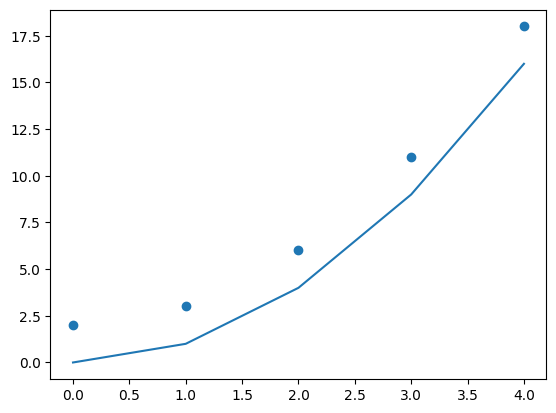

In [9]:
x=np.arange(5)
y=x**2
plt.plot(x,y)
fig=plt.gcf()#get current figure
ax=plt.gca()#get current axis
ax.scatter(x,y+2)
fig.show()

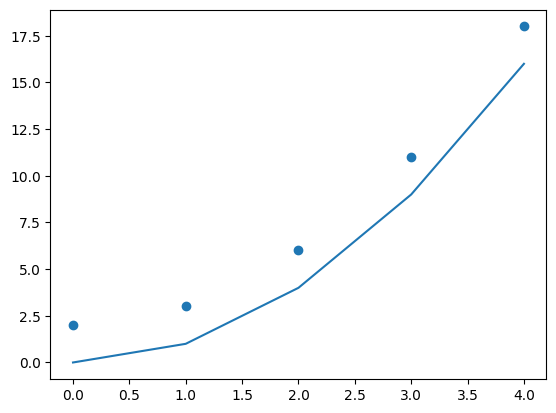

In [12]:

fig, axes = plt.subplots()
axes.plot(x,y)
axes.scatter(x,y+2)

/var/folders/z2/rmvv1qt937g_5bp6hf_qfy7h0000gn/T/ipykernel_9021/2053120018.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


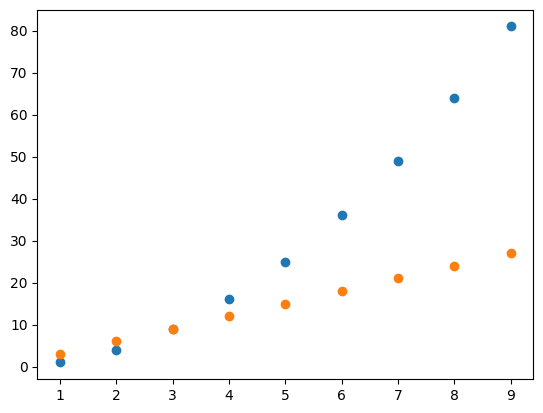

In [13]:
import matplotlib.pyplot as plt
x = [i for i in range(1,10)]
#note, list comprehension not needed for x
y = [i**2 for i in x]
z = [i*3 for i in x]
fig=plt.figure()
plt.scatter(x,y)
plt.scatter(x,z)
fig.show()
#ax_list = fig.axes